In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate

In [21]:
data = pd.read_csv('./Field_data/beehive_PMmodel.csv')
#data['parallax'] = data['parallax']/1000
data['parallax_error'] = data['parallax_error']/1000
data

,Unnamed: 0,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,rp_error,bp,bp_error,visibility_periods_used,astrometric_excess_noise,ruwe,phot_bp_rp_excess_factor,dr2_radial_velocity,dr2_radial_velocity_error,probability
0,14764,134.832416,0.131637,18.670913,0.080821,0.003622,0.000145,-38.160825,0.177297,-12.139050,...,17.149992,19.387869,11.136498,15,0.000000,0.997075,1.480274,0.00000,0.000000,0.533137
1,20323,132.723673,0.013953,15.384252,0.007047,0.005415,0.000017,-38.084380,0.017428,-13.298821,...,146.671050,10.771523,144.975020,19,0.075401,0.943226,1.197419,24.90745,0.313305,0.545457
2,30059,132.749353,0.098649,19.009852,0.050184,0.005270,0.000120,-37.884697,0.118360,-12.052656,...,9.828819,19.469730,6.872171,18,0.000000,0.971409,1.489209,0.00000,0.000000,0.597653
3,33452,132.556789,0.239898,19.689975,0.122937,0.005713,0.000254,-37.535694,0.284933,-13.175964,...,9.189552,21.003498,4.788151,19,0.504964,1.017902,1.552396,0.00000,0.000000,0.696966
4,33858,132.736799,0.048803,19.616040,0.024872,0.005222,0.000052,-36.487966,0.059948,-12.188652,...,17.325700,17.906534,11.072229,20,0.000000,1.025897,1.446187,0.00000,0.000000,0.801232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,188666,133.581748,0.079043,22.112198,0.040634,0.003619,0.000092,-36.256015,0.099099,-14.000603,...,11.062489,18.401300,5.666803,18,0.323609,1.140393,1.434175,0.00000,0.000000,0.752007
762,191257,130.141054,0.230718,24.456427,0.150611,0.003898,0.000273,-34.643029,0.264598,-13.665498,...,7.747037,20.637072,6.566285,18,0.767344,1.045540,1.504836,0.00000,0.000000,0.763524
763,197065,132.295572,0.084968,22.203655,0.042510,0.005046,0.000094,-35.314195,0.107034,-12.701056,...,11.922230,18.806185,9.321278,19,0.138954,1.015507,1.426105,0.00000,0.000000,0.831768
764,207396,126.184936,0.041970,22.669642,0.031795,0.003586,0.000051,-35.872450,0.049090,-14.360612,...,14.677680,17.303020,11.676072,19,0.000000,0.986883,1.368158,0.00000,0.000000,0.694132


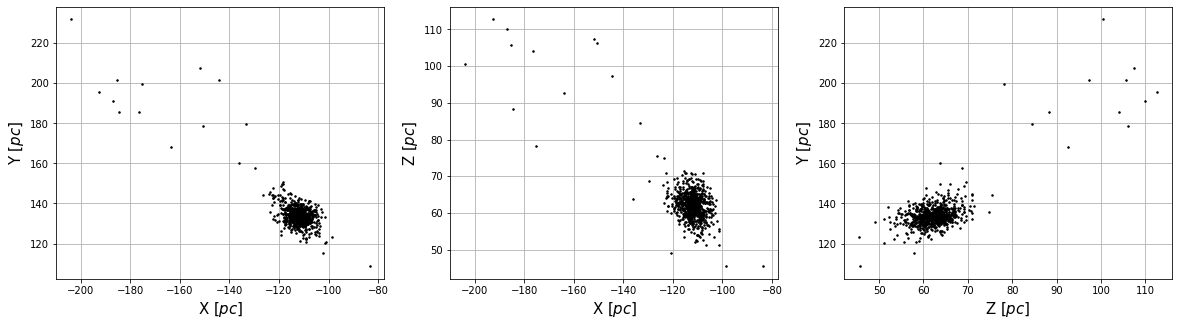

In [22]:
xm = (1/data['parallax']) * np.cos(np.radians(data['ra'])) * np.cos(np.radians(data['dec'])) #/1000
ym = (1/data['parallax']) * np.sin(np.radians(data['ra'])) * np.cos(np.radians(data['dec'])) #/1000
zm = (1/data['parallax']) * np.sin(np.radians(data['dec'])) #/1000


%matplotlib inline
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(xm, ym,color='black',marker='.',linestyle='None',markersize=3,alpha=1)
plt.xlabel("X $[pc]$", fontsize = 15)
plt.ylabel("Y $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()

plt.subplot(1,3,2)
plt.plot(xm, zm,color='black',marker='.',linestyle='None',markersize=3,alpha=1)
plt.xlabel("X $[pc]$", fontsize = 15)
plt.ylabel("Z $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()

plt.subplot(1,3,3)
plt.plot(zm, ym,color='black',marker='.',linestyle='None',markersize=3,alpha=1)
plt.xlabel("Z $[pc]$", fontsize = 15)
plt.ylabel("Y $[pc]$", fontsize = 15)#,rotation=0)
plt.grid()
#plt.savefig('./2d.jpg')
plt.show()

In [23]:
alpha = data.ra*np.pi/180 # Convert to radians
delta = data.dec*np.pi/180
w_ = data.parallax
sigmaw_ = data.parallax_error

In [919]:
#x = 1/w_*np.cos(alpha)*np.sin(delta)
#y = 1/w_*np.sin(alpha)*np.sin(delta)

93.39924692643206


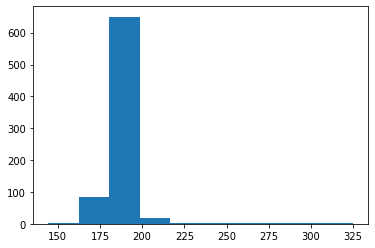

In [24]:
plt.hist(1/w_);
L = np.mean(1/w_)/2. # Debe ser la mitad de la longitud tipica
print(L)

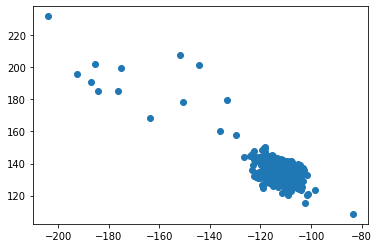

In [25]:
plt.scatter(xm,ym,marker='o')

In [26]:
def Prior(r,L = 100):
    return r**2*np.exp(-r/L)/(2*L**3)

def Likelihood(r,w0=0.004,sigmaw=0.06):
    return np.exp( -(w0 - 1./r)**2 /(2*sigmaw**2) )/sigmaw  

def Posterior(r,w0=0.004,sigmaw=0.06,L = 100):
    return Likelihood(r,w0,sigmaw)*Prior(r,L=L)

In [27]:
r = np.linspace(0.001,1000,1000)
posterior = Posterior(r,w0=0.0042, L = L)
jj = np.where(posterior == np.amax(posterior))
print(r[jj],1/r[jj])

[187.188] [0.00534222]


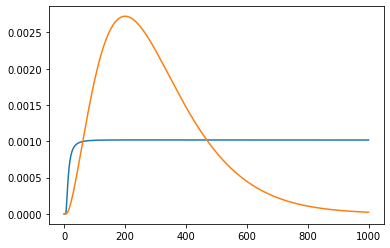

In [28]:
norm1 = integrate.quad(Likelihood,0.001,1000)[0]
norm2 = integrate.quad(Posterior,0.001,1000)[0]
plt.plot(r,Likelihood(r,w0=0.004)/norm1)
plt.plot(r,Posterior(r,0.004)/norm2)

In [29]:
def GetShift(w,sigmaw,L = 150):
    
    new_w = w.copy()
    
    r = np.linspace(0.001,1000,10000)
    
    for i in range(len(w)):
        posterior = Posterior(r,w[i],sigmaw[i],L=L)
        jj = np.where(posterior == np.amax(posterior))
        new_w[i] = 1/r[jj]
        
        
    return new_w

In [30]:
new_w = GetShift(w_,sigmaw_,L = L)

In [31]:
for i in range(len(w_)):
    if i%20 == 0:
        print(w_[i],new_w[i])

0.0036220933647077 0.0036280746450853938
0.0056496366373451 0.00564912627872308
0.0053959890282153 0.0053960906872343554
0.0053195555917178 0.005318594052305792
0.0053443586667681 0.005344177745870273
0.0052367431345249 0.005237798651759511
0.0055638603013741 0.005564248392896317
0.0053710097885319 0.005370008756304377
0.0054249798809361 0.005425369370964411
0.0054098873660766 0.005410690420704751
0.0054232469332178 0.005422427212638872
0.005487587613506 0.005487900727461993
0.0053560020533909 0.0053556274494041675
0.0053200730800037 0.005321424582241827
0.0053484928694205 0.005349896471557885
0.005437388496221 0.005437170001464267
0.0055051204042618 0.005506032458224886
0.0053463809920639 0.005347035579651215
0.0053585419893451 0.005358497545197997
0.0054722570171449 0.0054728819242522795
0.0051514873519039 0.005151446929232686
0.0054352464994023 0.005434215033825835
0.0054768727088792 0.005475879104950752
0.0056136746605861 0.005614235745205303
0.005616094424777 0.005617389792513087


In [32]:
x1 = 1/new_w*np.cos(alpha)*np.cos(delta)
y1 = 1/new_w*np.sin(alpha)*np.cos(delta)
z1 = 1/new_w*np.sin(delta)

#xm = (1/data['parallax']) * np.cos(np.radians(data['ra'])) * np.cos(np.radians(data['dec'])) #/1000
#ym = (1/data['parallax']) * np.sin(np.radians(data['ra'])) * np.cos(np.radians(data['dec'])) #/1000
#zm = (1/data['parallax']) * np.sin(np.radians(data['dec'])) #/1000

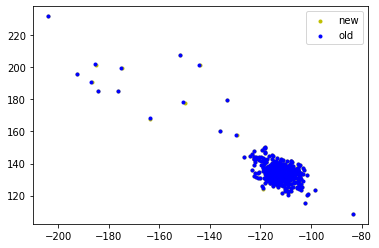

In [35]:
plt.scatter(x1,y1,marker='.',color='y',label='new')
plt.scatter(xm,ym,marker='.',color='b',label='old')
#plt.xlim(-600,-450)
plt.legend()